# PwC Call Center 


### Imports 

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:
callCenter_df = pd.read_excel('/Users/darylwanji/Desktop/Data Projects /Darylwanji-Data-Insights-for-Call-Center-Efficiency-and-Performance/Data/01 Call-Center-Dataset.xlsx')
callCenter_df.sample(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
4736,ID4737,Jim,2021-03-25,17:44:10,Contract related,Y,Y,44.0,00:05:28,3.0
906,ID0907,Becky,2021-01-16,16:36:29,Technical Support,Y,Y,61.0,00:06:14,3.0
131,ID0132,Diane,2021-01-03,10:58:05,Payment related,Y,Y,113.0,00:05:40,4.0
4619,ID4620,Diane,2021-03-23,16:20:38,Streaming,N,N,NaN,NaN,NaN
2785,ID2786,Dan,2021-02-18,10:16:19,Streaming,Y,Y,37.0,00:04:25,3.0
779,ID0780,Greg,2021-01-14,12:05:46,Streaming,Y,Y,35.0,00:04:24,5.0
3599,ID3600,Martha,2021-03-04,12:46:05,Contract related,Y,N,30.0,00:05:11,5.0
4349,ID4350,Becky,2021-03-18,13:49:26,Streaming,Y,Y,104.0,00:00:46,2.0
76,ID0077,Martha,2021-01-02,11:47:02,Technical Support,Y,Y,33.0,00:06:38,2.0
2212,ID2213,Stewart,2021-02-08,10:32:10,Technical Support,Y,Y,122.0,00:02:49,3.0


In [4]:
callCenter_df.shape

(5000, 10)

> 5000 Observations for 10 different variables

In [5]:
callCenter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


### Null values 
The are the columns that contain nulls values.      

> Speed of answer in seconds        
> AvgTalkDuration       
> Satisfaction rating       

### Data Types
The following datatypes needs to be addressed       
> Date, Time, AvgTalkDuration , Object -> Datetime        
> Answered (Y/N) and Resolved , Object -> Int 




In [6]:
callCenter_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed of answer in seconds,4054.0,67.520720,33.592872,10.0,39.0,68.0,97.0,125.0
Satisfaction rating,4054.0,3.403552,1.212220,1.0,3.0,3.0,4.0,5.0


> Takes on average 67 secs to answer a call with min 10s and max 125s           
>  3.4 Average rating           

These are excluding observations with no missing data handling. Anticipate a change after dealing with nulls values.

##### Datetime conversion 

In [7]:
callCenter_df['DateTime'] = pd.to_datetime(callCenter_df['Date'].astype(str) + ' '+ callCenter_df['Time'].astype(str))

##### Y/N Mapping 

In [8]:
"""
Mapping Y - > 1 and N - > 0 

"""
callCenter_df['Answered (Y/N)'] = callCenter_df['Answered (Y/N)'].map( {'Y': 1,'N': 0})
callCenter_df['Resolved'] = callCenter_df['Resolved'].map( {'Y': 1,'N': 0})

##### Sanity Check

In [9]:
callCenter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   object        
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   int64         
 6   Resolved                    5000 non-null   int64         
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   object        
 9   Satisfaction rating         4054 non-null   float64       
 10  DateTime                    5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
me

In [10]:
callCenter_df.sample(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,DateTime
2818,ID2819,Jim,2021-02-18,16:00:29,Payment related,0,0,NaN,NaN,NaN,2021-02-18 16:00:29
593,ID0594,Diane,2021-01-11,10:20:38,Payment related,1,1,70.0,00:01:27,5.0,2021-01-11 10:20:38
2251,ID2252,Becky,2021-02-09,10:10:34,Technical Support,1,1,83.0,00:05:13,5.0,2021-02-09 10:10:34
4888,ID4889,Martha,2021-03-29,09:11:31,Admin Support,1,1,109.0,00:06:21,5.0,2021-03-29 09:11:31
3024,ID3025,Jim,2021-02-22,15:18:43,Admin Support,1,1,112.0,00:01:59,3.0,2021-02-22 15:18:43
3033,ID3034,Dan,2021-02-22,15:48:58,Admin Support,1,1,59.0,00:03:42,3.0,2021-02-22 15:48:58
3806,ID3807,Martha,2021-03-08,10:29:17,Admin Support,1,1,119.0,00:00:51,3.0,2021-03-08 10:29:17
419,ID0420,Dan,2021-01-08,12:12:58,Streaming,1,1,112.0,00:03:41,2.0,2021-01-08 12:12:58
1772,ID1773,Dan,2021-02-01,09:18:43,Contract related,0,0,NaN,NaN,NaN,2021-02-01 09:18:43
98,ID0099,Dan,2021-01-02,13:20:38,Contract related,1,1,45.0,00:06:37,3.0,2021-01-02 13:20:38


In [11]:
# Drop Date and Time Columns

callCenter_df.drop(columns=['Date','Time'],inplace=True)
callCenter_df.reset_index(drop=True,inplace=True)
callCenter_df.sample(10)

,Call Id,Agent,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,DateTime
4954,ID4955,Joe,Admin Support,1,1,18.0,00:04:19,3.0,2021-03-30 12:04:19
877,ID0878,Dan,Payment related,1,1,55.0,00:05:07,3.0,2021-01-16 12:44:38
4536,ID4537,Stewart,Contract related,1,1,116.0,00:06:33,5.0,2021-03-21 17:42:43
2037,ID2038,Jim,Admin Support,0,0,NaN,NaN,NaN,2021-02-05 10:17:46
22,ID0023,Martha,Technical Support,0,0,NaN,NaN,NaN,2021-01-01 12:02:53
2871,ID2872,Joe,Admin Support,1,1,32.0,00:06:08,1.0,2021-02-19 17:29:46
2555,ID2556,Jim,Technical Support,0,0,NaN,NaN,NaN,2021-02-14 12:57:36
4629,ID4630,Joe,Payment related,0,0,NaN,NaN,NaN,2021-03-23 16:48:00
4399,ID4400,Greg,Admin Support,1,1,112.0,00:04:09,4.0,2021-03-19 12:59:02
2974,ID2975,Stewart,Payment related,0,0,NaN,NaN,NaN,2021-02-21 14:29:46


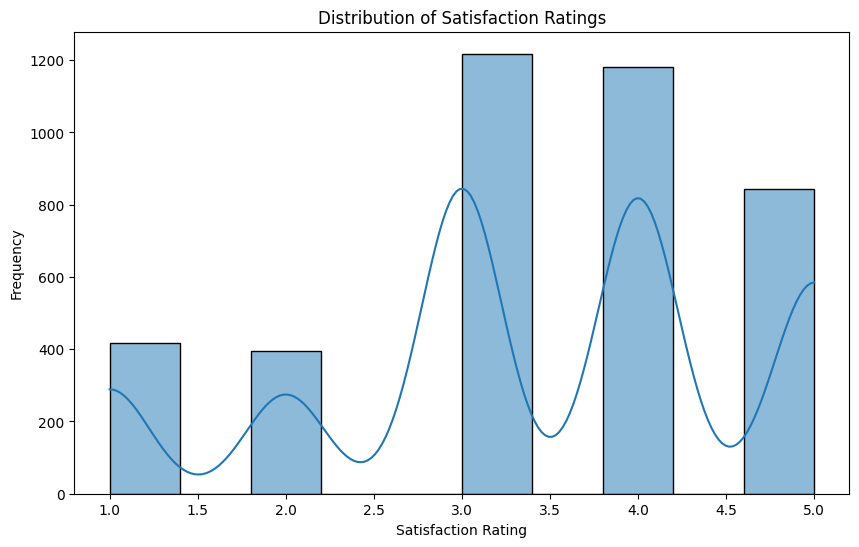

In [12]:
# Distribution of Satisfaction Ratings
plt.figure(figsize=(10, 6))
sns.histplot(callCenter_df['Satisfaction rating'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

Overall, there seem to be an above average satisfaction rating from customers with >= 

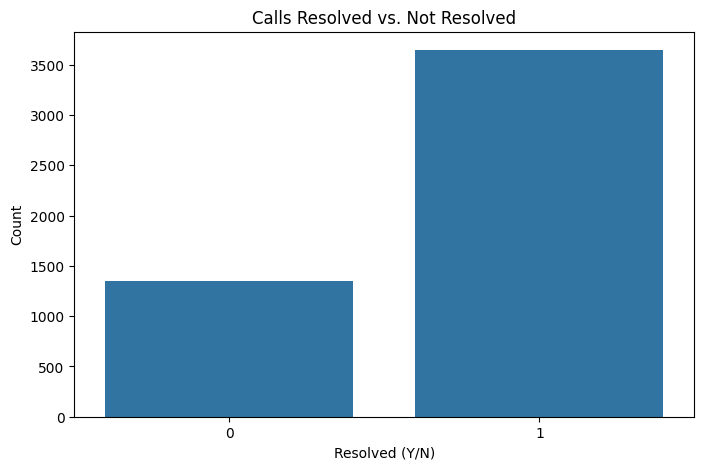

In [13]:
# Calls Resolved vs. Not Resolved
plt.figure(figsize=(8, 5))
sns.countplot(x='Resolved', data=callCenter_df)
plt.title('Calls Resolved vs. Not Resolved')
plt.xlabel('Resolved (Y/N)')
plt.ylabel('Count')
plt.show()

In [14]:
# Calculate metrics

agent_performance = callCenter_df.groupby('Agent').agg(
    AvgSatisfaction=('Satisfaction rating', 'mean'),
    TotalCalls=('Call Id', 'count'),
    ResolutionRate=('Resolved', lambda x: (x == 1).mean()),  # Percentage of 'Y'
   # AvgTalkDuration=('AvgTalkDuration', 'mean'),
    AvgSpeedOfAnswer=('Speed of answer in seconds', 'mean')
).reset_index()
agent_performance

,Agent,AvgSatisfaction,TotalCalls,ResolutionRate,AvgSpeedOfAnswer
0,Becky,3.371373,631,0.732171,65.330754
1,Dan,3.447419,633,0.744076,67.282983
2,Diane,3.405190,633,0.714060,66.267465
3,Greg,3.404382,624,0.729167,68.444223
4,Jim,3.393657,666,0.728228,66.343284
5,Joe,3.330579,593,0.735245,70.987603
6,Martha,3.470817,638,0.722571,69.488327
7,Stewart,3.400419,582,0.728522,66.184486


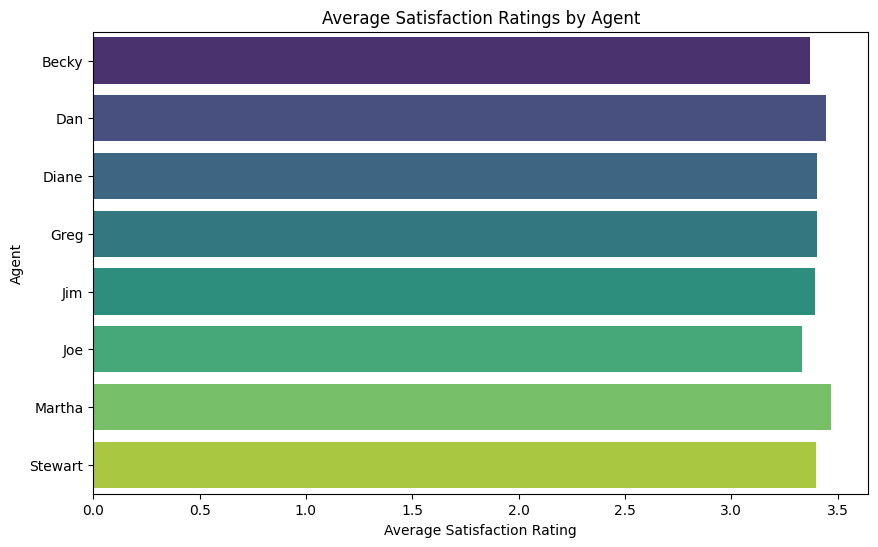

In [15]:
# Visualization of Average Satisfaction Ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='AvgSatisfaction', y='Agent', data=agent_performance, palette='viridis')
plt.title('Average Satisfaction Ratings by Agent')
plt.xlabel('Average Satisfaction Rating')
plt.ylabel('Agent')
plt.show()

Martha and Dan stand out as Agent with the Best Satisfaction Rating

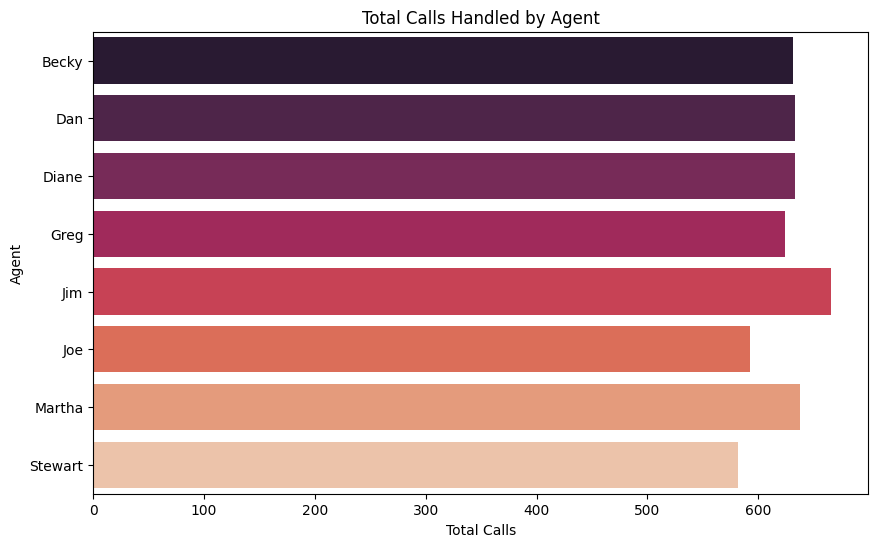

In [16]:
# Visualization of Total Calls Handled
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalCalls', y='Agent', data=agent_performance, palette='rocket')
plt.title('Total Calls Handled by Agent')
plt.xlabel('Total Calls')
plt.ylabel('Agent')
plt.show()

Jim and Martha take the most calls 

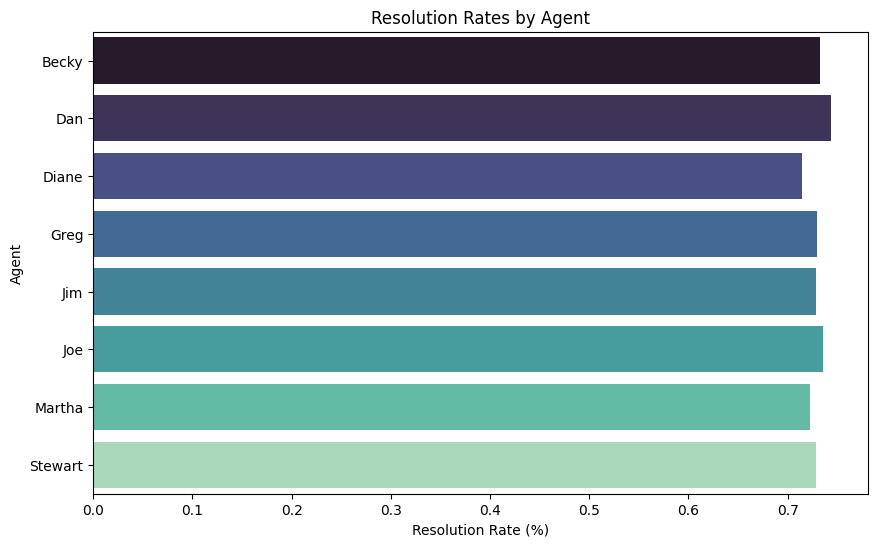

In [17]:
# Visualization of Resolution Rates
plt.figure(figsize=(10, 6))
sns.barplot(x='ResolutionRate', y='Agent', data=agent_performance, palette='mako')
plt.title('Resolution Rates by Agent')
plt.xlabel('Resolution Rate (%)')
plt.ylabel('Agent')
plt.show()

Dan and Martha, leading with Resolution rates.      
> Martha seems to be leading in a lot of metrics. 

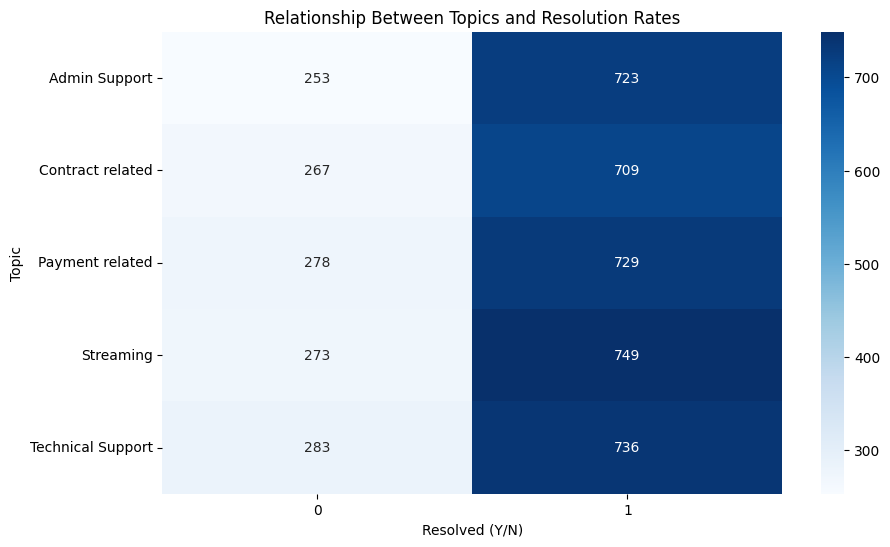

In [18]:
# Pivot table for topics and resolution rates
topic_resolution = callCenter_df.pivot_table(index='Topic', columns='Resolved', values='Call Id', aggfunc='count', fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(topic_resolution, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship Between Topics and Resolution Rates')
plt.xlabel('Resolved (Y/N)')
plt.ylabel('Topic')
plt.show()

All topics have a High number of resolutions. 
> Streaming with the highest number of resolved issues.
> Technical Support with the Highest number of unresolved issues.

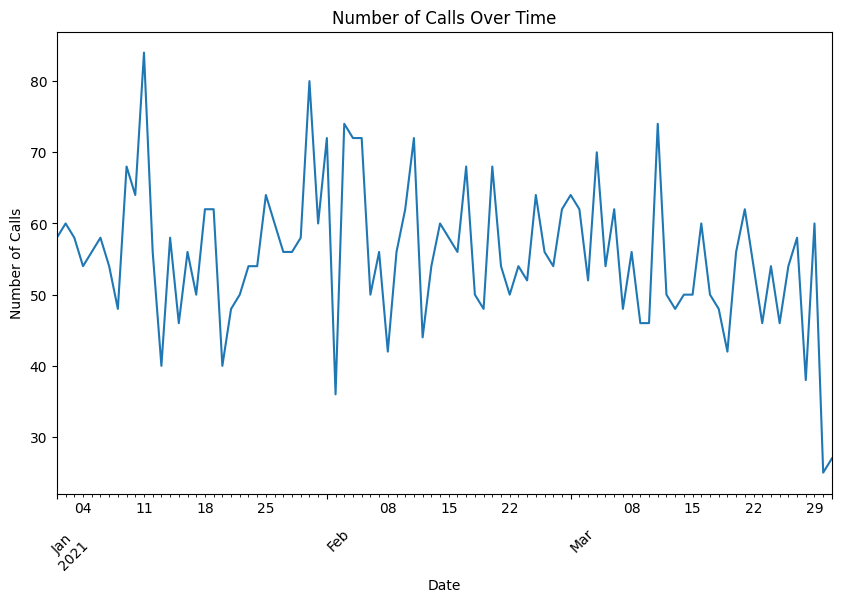

In [19]:
# Resample to get daily counts
calls_over_time = callCenter_df.resample('D', on='DateTime').size()

plt.figure(figsize=(10, 6))
calls_over_time.plot(kind='line')
plt.title('Number of Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

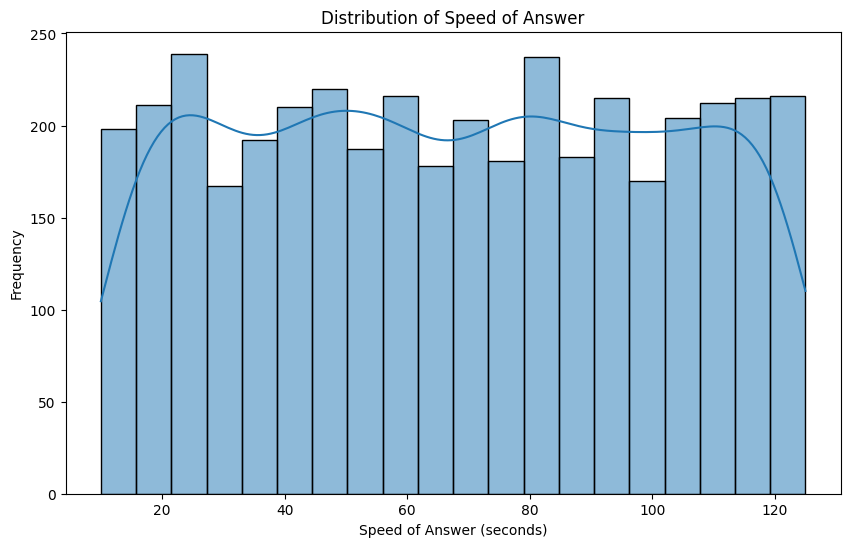

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(callCenter_df['Speed of answer in seconds'], bins=20, kde=True)
plt.title('Distribution of Speed of Answer')
plt.xlabel('Speed of Answer (seconds)')
plt.ylabel('Frequency')
plt.show()

> On average, calls are answered within  ~ 20 - 115 seconds

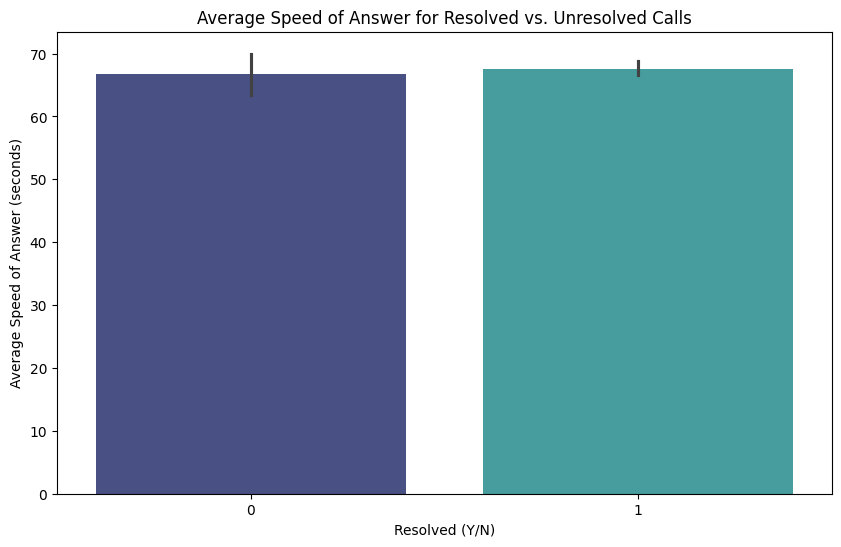

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Resolved', y='Speed of answer in seconds', data=callCenter_df, estimator='mean', palette='mako')
plt.title('Average Speed of Answer for Resolved vs. Unresolved Calls')
plt.xlabel('Resolved (Y/N)')
plt.ylabel('Average Speed of Answer (seconds)')
plt.show()

> Speed of Answer for Resolved and Unresolved calls are evenly distributed, there is no imbalance.

In [22]:
callCenter_df.to_csv("/Users/darylwanji/Desktop/Data Projects /Darylwanji-Data-Insights-for-Call-Center-Efficiency-and-Performance/Data/Callcenter_cleaned.csv")